In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
## 폰트 깨짐 문제 해결##
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 9, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 보이게 하기

Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [5]:
foot_traffic_df_origin = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/merged_foot_traffic.csv')
rain_fall_df_origin = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/RainFall_final.csv')

foot_traffic_df = foot_traffic_df_origin.copy()
rain_fall_df = rain_fall_df_origin.copy()
rain_fall_grouped_df = rain_fall_df.groupby(['Gu', 'Date']).agg({'DailyRain': 'sum'}).reset_index()

In [6]:
foot_traffic_df.head()

,자치구,측정날짜,방문자수
0,Dobong-gu,2023-01-01,832.0
1,Eunpyeong-gu,2023-01-01,8.0
2,Yangcheon-gu,2023-01-01,555.0
3,Gangbuk-gu,2023-01-01,457.0
4,Songpa-gu,2023-01-01,122.0


In [7]:
# 일별 유동인구 증가량 계산
foot_traffic_df['증감률'] = 0  # 증감률 컬럼 초기화
for i in range(1, len(foot_traffic_df)):
  prev_visitor = foot_traffic_df.iloc[i-1, foot_traffic_df.columns.get_loc('방문자수')]
  curr_visitor = foot_traffic_df.iloc[i, foot_traffic_df.columns.get_loc('방문자수')]
  rate = (curr_visitor - prev_visitor) / prev_visitor
  if rate >= 50 :
    foot_traffic_df.iloc[i, foot_traffic_df.columns.get_loc('증감률')] = 50
  else :
    foot_traffic_df.iloc[i, foot_traffic_df.columns.get_loc('증감률')] = rate

# 결과 출력
foot_traffic_df.head()

<ipython-input-7-b7063a57c24f>:6: RuntimeWarning: divide by zero encountered in double_scalars
  rate = (curr_visitor - prev_visitor) / prev_visitor


,자치구,측정날짜,방문자수,증감률
0,Dobong-gu,2023-01-01,832.0,0.000000
1,Eunpyeong-gu,2023-01-01,8.0,-0.990385
2,Yangcheon-gu,2023-01-01,555.0,50.000000
3,Gangbuk-gu,2023-01-01,457.0,-0.176577
4,Songpa-gu,2023-01-01,122.0,-0.733042


In [8]:
rain_fall_grouped_df.head()

,Gu,Date,DailyRain
0,강남구,2023-01-01,0.0
1,강남구,2023-01-02,0.0
2,강남구,2023-01-03,0.0
3,강남구,2023-01-04,0.0
4,강남구,2023-01-05,0.0


In [9]:
rain_fall_grouped_df.to_csv('/content/drive/MyDrive/SWING/HOMERUN/sum_rain_fall.csv', index=False)

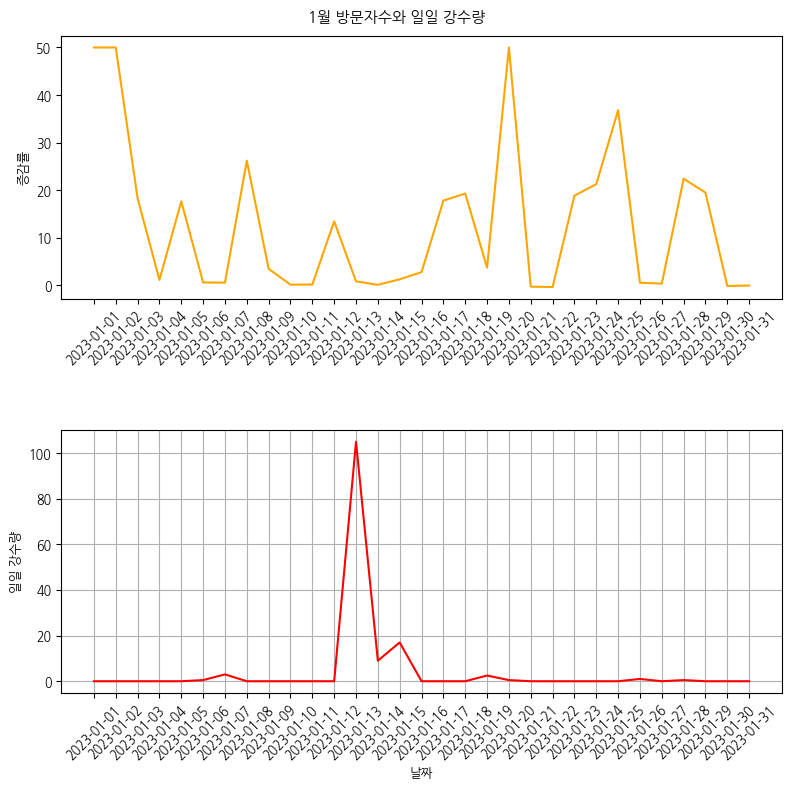

In [10]:
# 데이터 필터링
foot_traffic_filtered = foot_traffic_df[(foot_traffic_df['자치구'] == 'Gangnam-gu') & (foot_traffic_df['측정날짜'] >= '2023-01-01') & (foot_traffic_df['측정날짜'] <= '2023-01-31')]
rain_fall_filtered = rain_fall_grouped_df[(rain_fall_grouped_df['Gu'] == '강남구') & (rain_fall_grouped_df['Date'] >= '2023-01-01') & (rain_fall_grouped_df['Date'] <= '2023-01-31')]

# 서브 플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# 45도 회전
plt.xticks(rotation=45)

# 첫 번째 서브 플롯 (방문자수)
ax1.plot(foot_traffic_filtered['측정날짜'], foot_traffic_filtered['증감률'], color='orange')
ax1.set_ylabel('증감률')
ax1.set_xticks(foot_traffic_filtered['측정날짜'])
ax1.set_xticklabels(foot_traffic_filtered['측정날짜'], rotation=45)

# 두 번째 서브 플롯 (일일 강수량)
ax2.plot(rain_fall_filtered['Date'], rain_fall_filtered['DailyRain'], color='red')
ax2.set_ylabel('일일 강수량')
ax2.set_xlabel('날짜')

# 타이틀 추가
plt.suptitle('1월 방문자수와 일일 강수량')

# 그래프 간격 조절
plt.tight_layout(h_pad=5, w_pad=8)

# 그래프 표시
plt.rc('font', family='NanumGothic')
plt.grid()
plt.show()

#1월 12일 강남-제20회 대한민국 교육박람회

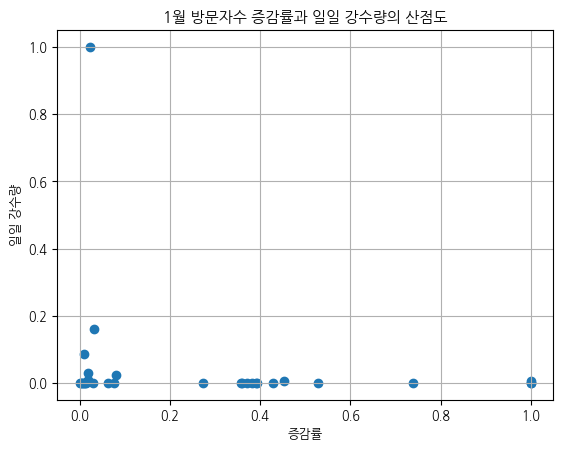

In [11]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 필터링
foot_traffic_filtered = foot_traffic_df[(foot_traffic_df['자치구'] == 'Gangnam-gu') & (foot_traffic_df['측정날짜'] >= '2023-01-01') & (foot_traffic_df['측정날짜'] <= '2023-01-31')]
rain_fall_filtered = rain_fall_grouped_df[(rain_fall_grouped_df['Gu'] == '강남구') & (rain_fall_grouped_df['Date'] >= '2023-01-01') & (rain_fall_grouped_df['Date'] <= '2023-01-31')]

# 최소-최대 스케일링
scaler = MinMaxScaler()
foot_traffic_scaled = scaler.fit_transform(foot_traffic_filtered[['증감률']])
rain_fall_scaled = scaler.fit_transform(rain_fall_filtered[['DailyRain']])


# 산점도 그리기
plt.scatter(foot_traffic_scaled, rain_fall_scaled)
plt.xlabel('증감률')
plt.ylabel('일일 강수량')
plt.title('1월 방문자수 증감률과 일일 강수량의 산점도')

# 그래프 표시
plt.grid()
plt.show()

In [12]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [13]:
correlation = spearmanr(foot_traffic_scaled, rain_fall_scaled)
print(correlation)

SignificanceResult(statistic=-0.12836594103378696, pvalue=0.4913291433109749)


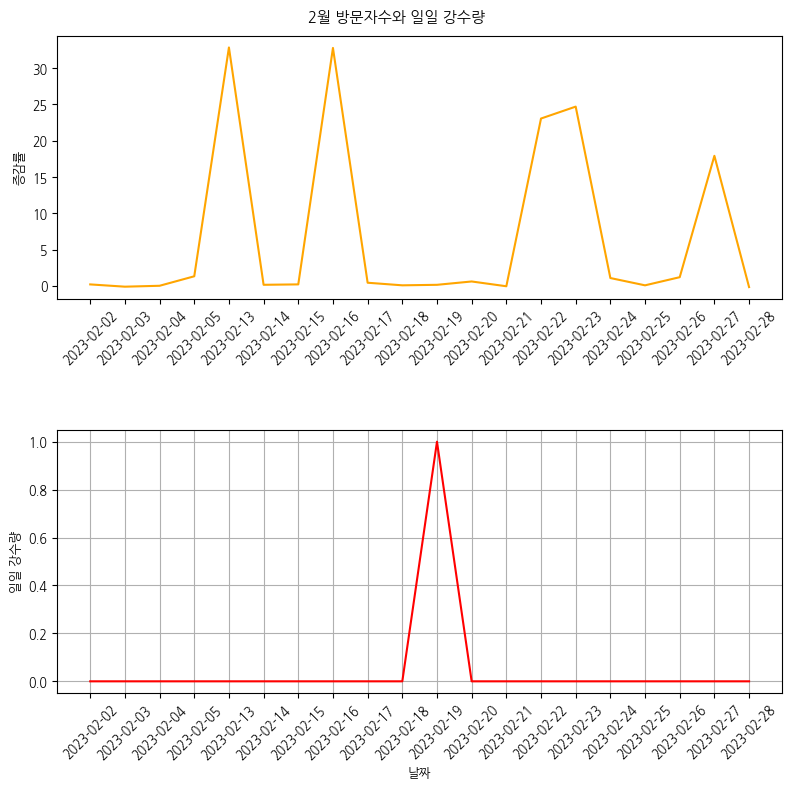

In [14]:
# 데이터 필터링
foot_traffic_filtered = foot_traffic_df[(foot_traffic_df['자치구'] == 'Gangnam-gu') & (foot_traffic_df['측정날짜'] >= '2023-02-01') & (foot_traffic_df['측정날짜'] <= '2023-02-28')]
rain_fall_filtered = rain_fall_grouped_df[(rain_fall_grouped_df['Gu'] == '강남구') & (rain_fall_grouped_df['Date'] >= '2023-02-02') & (rain_fall_grouped_df['Date'] <= '2023-02-28')]

# 2월 6일부터 2월 12일까지의 데이터 제외
rain_fall_filtered_more = rain_fall_filtered[~rain_fall_filtered['Date'].between('2023-02-06', '2023-02-12')]

# 서브 플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# 45도 회전
plt.xticks(rotation=45)

# 첫 번째 서브 플롯 (방문자수)
ax1.plot(foot_traffic_filtered['측정날짜'], foot_traffic_filtered['증감률'], color='orange')
ax1.set_ylabel('증감률')
ax1.set_xticks(foot_traffic_filtered['측정날짜'])
ax1.set_xticklabels(foot_traffic_filtered['측정날짜'], rotation=45)

# 두 번째 서브 플롯 (일일 강수량)
ax2.plot(rain_fall_filtered_more['Date'], rain_fall_filtered_more['DailyRain'], color='red')
ax2.set_ylabel('일일 강수량')
ax2.set_xlabel('날짜')

# 타이틀 추가
plt.suptitle('2월 방문자수와 일일 강수량')

# 그래프 간격 조절
plt.tight_layout(h_pad=5, w_pad=8)

# 그래프 표시
plt.rc('font', family='NanumGothic')
plt.grid()
plt.show()

#1월 12일 강남-제20회 대한민국 교육박람회

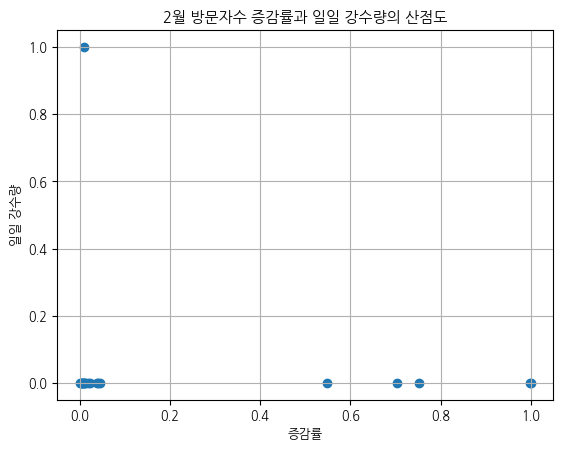

In [15]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 필터링
foot_traffic_filtered = foot_traffic_df[(foot_traffic_df['자치구'] == 'Gangnam-gu') & (foot_traffic_df['측정날짜'] >= '2023-02-01') & (foot_traffic_df['측정날짜'] <= '2023-02-28')]
rain_fall_filtered = rain_fall_grouped_df[(rain_fall_grouped_df['Gu'] == '강남구') & (rain_fall_grouped_df['Date'] >= '2023-02-02') & (rain_fall_grouped_df['Date'] <= '2023-02-28')]

# 2월 6일부터 2월 12일까지의 데이터 제외
rain_fall_filtered_more = rain_fall_filtered[~rain_fall_filtered['Date'].between('2023-02-06', '2023-02-12')]

# 최소-최대 스케일링
scaler = MinMaxScaler()
foot_traffic_scaled = scaler.fit_transform(foot_traffic_filtered[['증감률']])
rain_fall_scaled = scaler.fit_transform(rain_fall_filtered_more[['DailyRain']])

# 산점도 그리기
plt.scatter(foot_traffic_scaled, rain_fall_scaled)
plt.grid()
plt.xlabel('증감률')
plt.ylabel('일일 강수량')
plt.title('2월 방문자수 증감률과 일일 강수량의 산점도')

# 그래프 표시
plt.show()

In [16]:
correlation = spearmanr(foot_traffic_scaled, rain_fall_scaled)
print(correlation)

SignificanceResult(statistic=-0.1392500690033995, pvalue=0.5582037583475348)


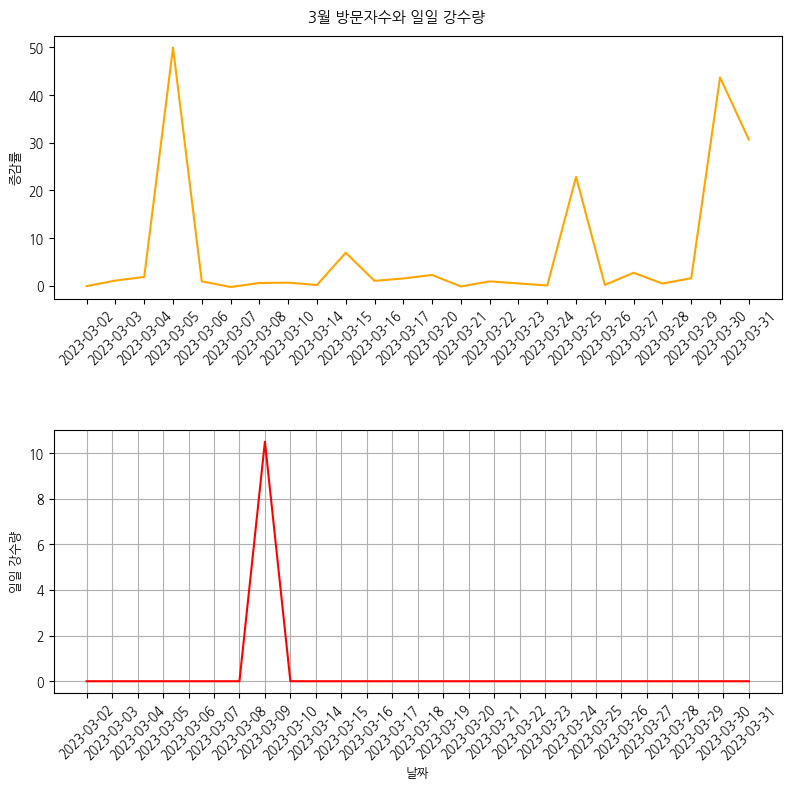

In [17]:
# 데이터 필터링
foot_traffic_filtered = foot_traffic_df[(foot_traffic_df['자치구'] == 'Gangnam-gu') & (foot_traffic_df['측정날짜'] >= '2023-03-01') & (foot_traffic_df['측정날짜'] <= '2023-03-31')]
rain_fall_filtered = rain_fall_grouped_df[(rain_fall_grouped_df['Gu'] == '강남구') & (rain_fall_grouped_df['Date'] >= '2023-03-02') & (rain_fall_grouped_df['Date'] <= '2023-03-31')]

# 서브 플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# 3월 9,11,12,13,18,19일 데이터 제외
rain_fall_filtered_more = rain_fall_filtered[~rain_fall_filtered['Date'].between('2023-03-11', '2023-03-13')]
# rain_fall_filtered_more = rain_fall_filtered[~rain_fall_filtered['Date'].between('2023-03-18', '2023-03-19')]
# rain_fall_filtered_more = rain_fall_filtered_more[~(rain_fall_filtered_more['Date'] == '2023-03-09')]

# 45도 회전
plt.xticks(rotation=45)

# 첫 번째 서브 플롯 (방문자수)
ax1.plot(foot_traffic_filtered['측정날짜'], foot_traffic_filtered['증감률'], color='orange')
ax1.set_ylabel('증감률')
ax1.set_xticks(foot_traffic_filtered['측정날짜'])
ax1.set_xticklabels(foot_traffic_filtered['측정날짜'], rotation=45)

# 두 번째 서브 플롯 (일일 강수량)
ax2.plot(rain_fall_filtered_more['Date'], rain_fall_filtered_more['DailyRain'], color='red')
ax2.set_ylabel('일일 강수량')
ax2.set_xlabel('날짜')

# 타이틀 추가
plt.suptitle('3월 방문자수와 일일 강수량')

# 그래프 간격 조절
plt.tight_layout(h_pad=5, w_pad=8)

# 그래프 표시
plt.grid()
plt.rc('font', family='NanumGothic')
plt.show()


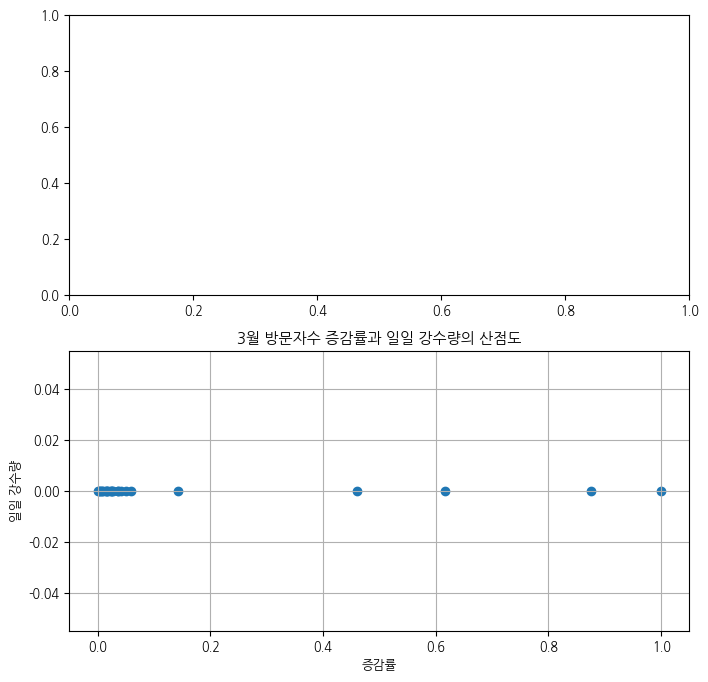

In [18]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 필터링
foot_traffic_filtered = foot_traffic_df[(foot_traffic_df['자치구'] == 'Gangnam-gu') & (foot_traffic_df['측정날짜'] >= '2023-03-01') & (foot_traffic_df['측정날짜'] <= '2023-03-31')]
rain_fall_filtered = rain_fall_grouped_df[(rain_fall_grouped_df['Gu'] == '강남구') & (rain_fall_grouped_df['Date'] >= '2023-03-02') & (rain_fall_grouped_df['Date'] <= '2023-03-31')]

# 서브 플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# 3월 9,11,12,13,18,19일 데이터 제외
rain_fall_filtered_more = rain_fall_filtered[~rain_fall_filtered['Date'].between('2023-03-11', '2023-03-13')]
rain_fall_filtered_more = rain_fall_filtered_more[~(rain_fall_filtered_more['Date'] == '2023-03-09')]
rain_fall_filtered_more = rain_fall_filtered_more[~(rain_fall_filtered_more['Date'] == '2023-03-18')]
rain_fall_filtered_more = rain_fall_filtered_more[~(rain_fall_filtered_more['Date'] == '2023-03-19')]

# 최소-최대 스케일링
scaler = MinMaxScaler()
foot_traffic_scaled = scaler.fit_transform(foot_traffic_filtered[['증감률']])
rain_fall_scaled = scaler.fit_transform(rain_fall_filtered_more[['DailyRain']])

# 산점도 그리기
plt.scatter(foot_traffic_scaled, rain_fall_scaled)
plt.grid()
plt.xlabel('증감률')
plt.ylabel('일일 강수량')
plt.title('3월 방문자수 증감률과 일일 강수량의 산점도')

# 그래프 표시
plt.show()

In [19]:
correlation = spearmanr(foot_traffic_scaled, rain_fall_scaled)
print(correlation)

SignificanceResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


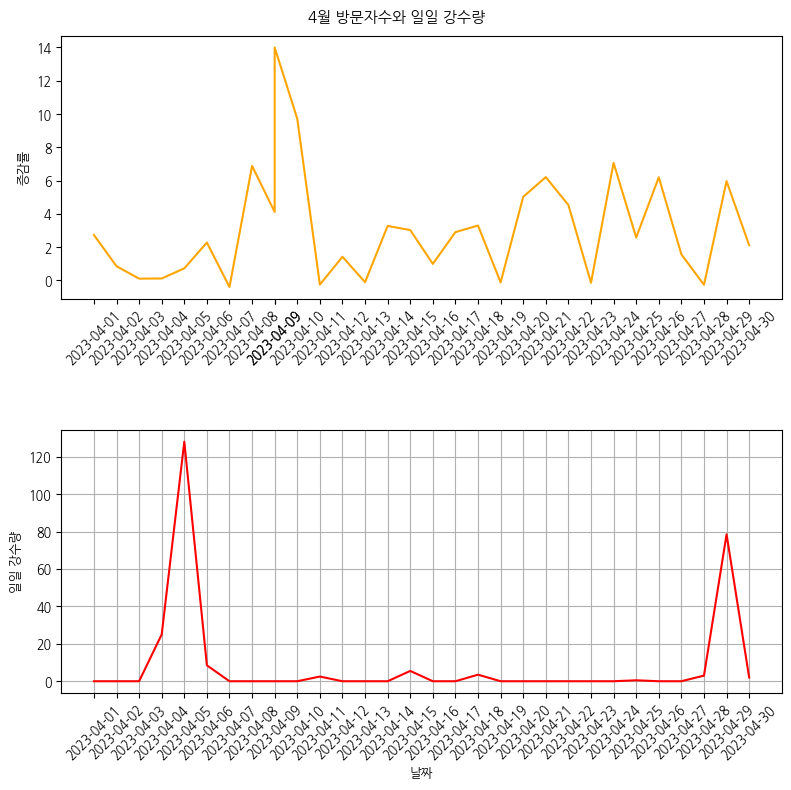

In [20]:
# 데이터 필터링
foot_traffic_filtered = foot_traffic_df[(foot_traffic_df['자치구'] == 'Gangnam-gu') & (foot_traffic_df['측정날짜'] >= '2023-04-01') & (foot_traffic_df['측정날짜'] <= '2023-04-30')]
rain_fall_filtered = rain_fall_grouped_df[(rain_fall_grouped_df['Gu'] == '강남구') & (rain_fall_grouped_df['Date'] >= '2023-04-01') & (rain_fall_grouped_df['Date'] <= '2023-04-30')]

# 서브 플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# 45도 회전
plt.xticks(rotation=45)

# 첫 번째 서브 플롯 (방문자수)
ax1.plot(foot_traffic_filtered['측정날짜'], foot_traffic_filtered['증감률'], color='orange')
ax1.set_ylabel('증감률')
ax1.set_xticks(foot_traffic_filtered['측정날짜'])
ax1.set_xticklabels(foot_traffic_filtered['측정날짜'], rotation=45)

# 두 번째 서브 플롯 (일일 강수량)
ax2.plot(rain_fall_filtered['Date'], rain_fall_filtered['DailyRain'], color='red')
ax2.set_ylabel('일일 강수량')
ax2.set_xlabel('날짜')

# 타이틀 추가
plt.suptitle('4월 방문자수와 일일 강수량')

# 그래프 간격 조절
plt.tight_layout(h_pad=5, w_pad=8)

# 그래프 표시
plt.grid()
plt.rc('font', family='NanumGothic')
plt.show()


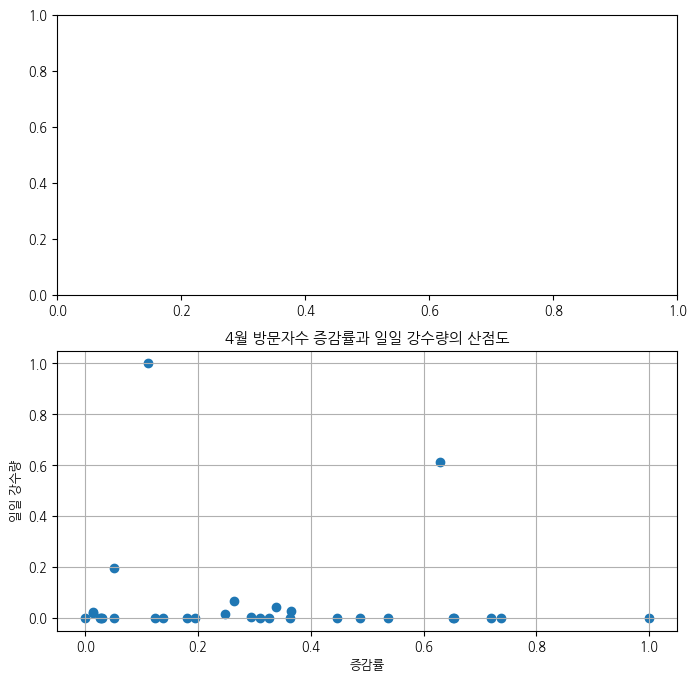

In [21]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 필터링
foot_traffic_filtered = foot_traffic_df[(foot_traffic_df['자치구'] == 'Gangnam-gu') & (foot_traffic_df['측정날짜'] >= '2023-04-01') & (foot_traffic_df['측정날짜'] <= '2023-04-30')]
rain_fall_filtered = rain_fall_grouped_df[(rain_fall_grouped_df['Gu'] == '강남구') & (rain_fall_grouped_df['Date'] >= '2023-04-01') & (rain_fall_grouped_df['Date'] <= '2023-04-30')]
foot_traffic_filter = foot_traffic_filtered.drop(1935)

# 서브 플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# 최소-최대 스케일링
scaler = MinMaxScaler()
foot_traffic_scaled = scaler.fit_transform(foot_traffic_filter[['증감률']])
rain_fall_scaled = scaler.fit_transform(rain_fall_filtered[['DailyRain']])

# 산점도 그리기
plt.scatter(foot_traffic_scaled, rain_fall_scaled)
plt.grid()
plt.xlabel('증감률')
plt.ylabel('일일 강수량')
plt.title('4월 방문자수 증감률과 일일 강수량의 산점도')

# 그래프 표시
plt.show()

In [22]:
correlation = spearmanr(foot_traffic_scaled, rain_fall_scaled)
print(correlation)

SignificanceResult(statistic=-0.16278585538140924, pvalue=0.3900742993419225)


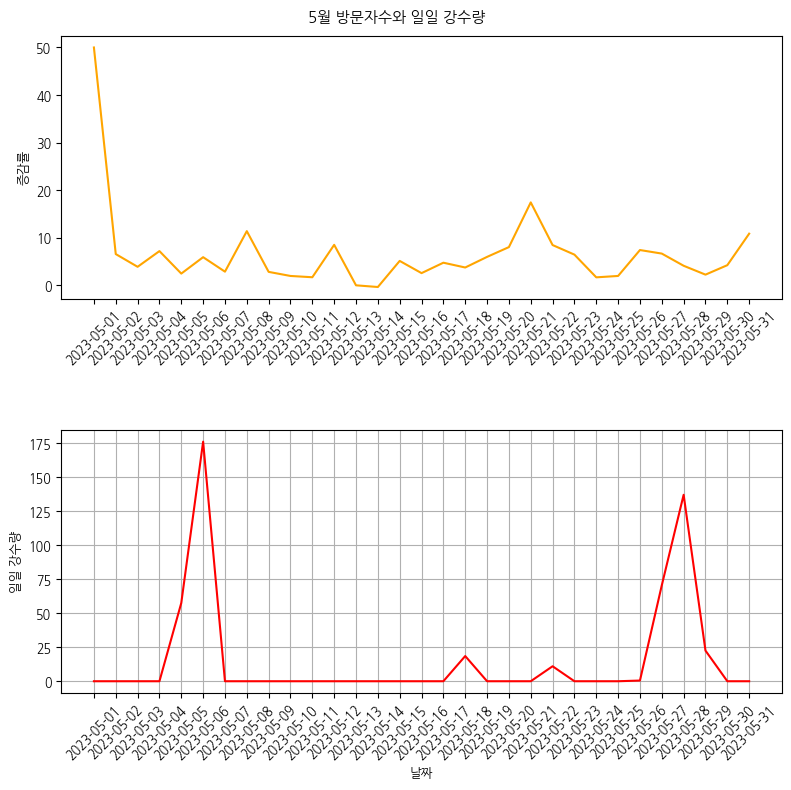

In [23]:
# 데이터 필터링
foot_traffic_filtered = foot_traffic_df[(foot_traffic_df['자치구'] == 'Gangnam-gu') & (foot_traffic_df['측정날짜'] >= '2023-05-01') & (foot_traffic_df['측정날짜'] <= '2023-05-31')]
rain_fall_filtered = rain_fall_grouped_df[(rain_fall_grouped_df['Gu'] == '강남구') & (rain_fall_grouped_df['Date'] >= '2023-05-01') & (rain_fall_grouped_df['Date'] <= '2023-05-31')]

# 서브 플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# 45도 회전
plt.xticks(rotation=45)

# 첫 번째 서브 플롯 (방문자수)
ax1.plot(foot_traffic_filtered['측정날짜'], foot_traffic_filtered['증감률'], color='orange')
ax1.set_ylabel('증감률')
ax1.set_xticks(foot_traffic_filtered['측정날짜'])
ax1.set_xticklabels(foot_traffic_filtered['측정날짜'], rotation=45)

# 두 번째 서브 플롯 (일일 강수량)
ax2.plot(rain_fall_filtered['Date'], rain_fall_filtered['DailyRain'], color='red')
ax2.set_ylabel('일일 강수량')
ax2.set_xlabel('날짜')

# 타이틀 추가
plt.suptitle('5월 방문자수와 일일 강수량')

# 그래프 간격 조절
plt.tight_layout(h_pad=5, w_pad=8)

# 그래프 표시
plt.grid()
plt.rc('font', family='NanumGothic')
plt.show()


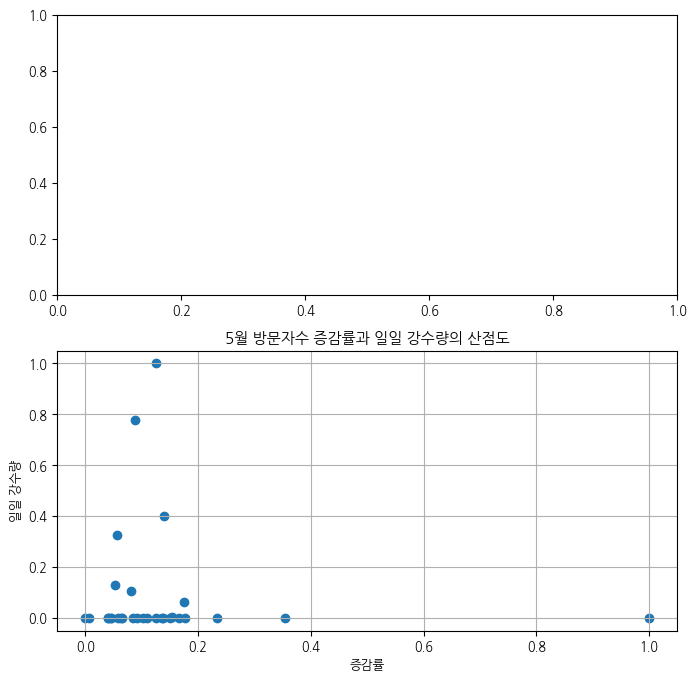

In [24]:
from sklearn.preprocessing import MinMaxScaler
# 데이터 필터링
foot_traffic_filtered = foot_traffic_df[(foot_traffic_df['자치구'] == 'Gangnam-gu') & (foot_traffic_df['측정날짜'] >= '2023-05-01') & (foot_traffic_df['측정날짜'] <= '2023-05-30')]
rain_fall_filtered = rain_fall_grouped_df[(rain_fall_grouped_df['Gu'] == '강남구') & (rain_fall_grouped_df['Date'] >= '2023-05-01') & (rain_fall_grouped_df['Date'] <= '2023-05-30')]

# 서브 플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# 최소-최대 스케일링
scaler = MinMaxScaler()
foot_traffic_scaled = scaler.fit_transform(foot_traffic_filtered[['증감률']])
rain_fall_scaled = scaler.fit_transform(rain_fall_filtered[['DailyRain']])

# 산점도 그리기
plt.scatter(foot_traffic_scaled, rain_fall_scaled)
plt.grid()
plt.xlabel('증감률')
plt.ylabel('일일 강수량')
plt.title('5월 방문자수 증감률과 일일 강수량의 산점도')

# 그래프 표시
plt.show()

In [25]:
correlation = spearmanr(foot_traffic_scaled, rain_fall_scaled)
print(correlation)

SignificanceResult(statistic=0.039723398820903706, pvalue=0.8349080950785244)


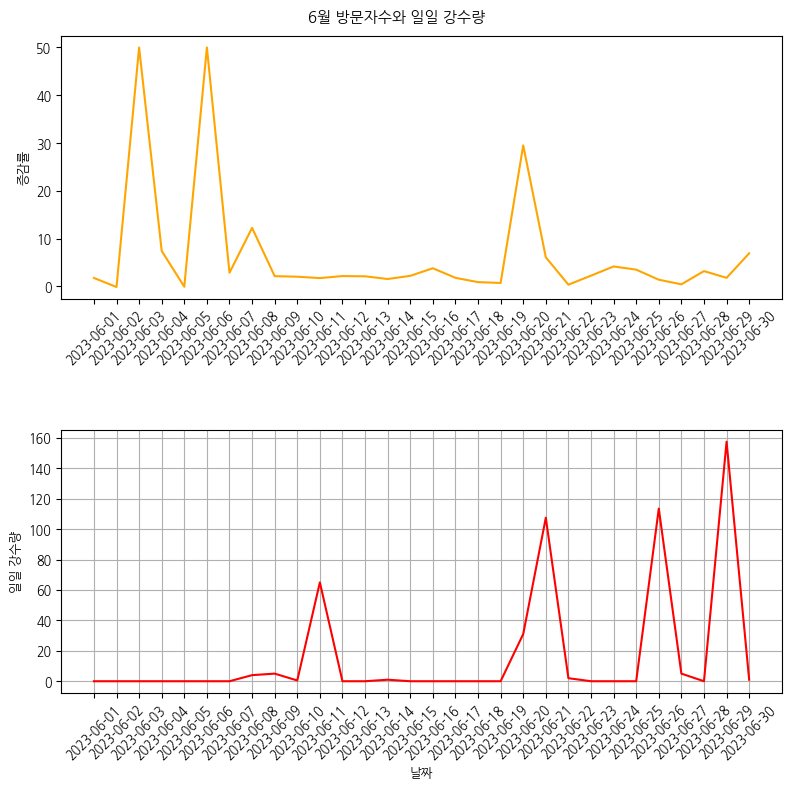

In [26]:
# 데이터 필터링
foot_traffic_filtered = foot_traffic_df[(foot_traffic_df['자치구'] == 'Gangnam-gu') & (foot_traffic_df['측정날짜'] >= '2023-06-01') & (foot_traffic_df['측정날짜'] <= '2023-06-30')]
rain_fall_filtered = rain_fall_grouped_df[(rain_fall_grouped_df['Gu'] == '강남구') & (rain_fall_grouped_df['Date'] >= '2023-06-01') & (rain_fall_grouped_df['Date'] <= '2023-06-30')]

# 서브 플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# 45도 회전
plt.xticks(rotation=45)

# 첫 번째 서브 플롯 (방문자수)
ax1.plot(foot_traffic_filtered['측정날짜'], foot_traffic_filtered['증감률'], color='orange')
ax1.set_ylabel('증감률')
ax1.set_xticks(foot_traffic_filtered['측정날짜'])
ax1.set_xticklabels(foot_traffic_filtered['측정날짜'], rotation=45)

# 두 번째 서브 플롯 (일일 강수량)
ax2.plot(rain_fall_filtered['Date'], rain_fall_filtered['DailyRain'], color='red')
ax2.set_ylabel('일일 강수량')
ax2.set_xlabel('날짜')

# 타이틀 추가
plt.suptitle('6월 방문자수와 일일 강수량')

# 그래프 간격 조절
plt.tight_layout(h_pad=5, w_pad=8)

# 그래프 표시
plt.grid()
plt.rc('font', family='NanumGothic')
plt.show()


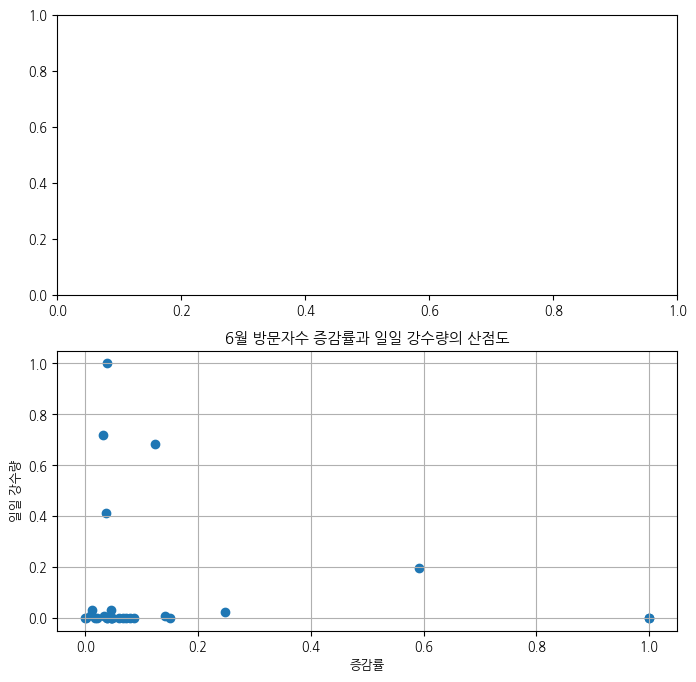

In [27]:
from sklearn.preprocessing import MinMaxScaler
# 데이터 필터링
foot_traffic_filtered = foot_traffic_df[(foot_traffic_df['자치구'] == 'Gangnam-gu') & (foot_traffic_df['측정날짜'] >= '2023-06-01') & (foot_traffic_df['측정날짜'] <= '2023-06-30')]
rain_fall_filtered = rain_fall_grouped_df[(rain_fall_grouped_df['Gu'] == '강남구') & (rain_fall_grouped_df['Date'] >= '2023-06-01') & (rain_fall_grouped_df['Date'] <= '2023-06-30')]

# 서브 플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# 최소-최대 스케일링
scaler = MinMaxScaler()
foot_traffic_scaled = scaler.fit_transform(foot_traffic_filtered[['증감률']])
rain_fall_scaled = scaler.fit_transform(rain_fall_filtered[['DailyRain']])

# 산점도 그리기
plt.scatter(foot_traffic_scaled, rain_fall_scaled)
plt.grid()
plt.xlabel('증감률')
plt.ylabel('일일 강수량')
plt.title('6월 방문자수 증감률과 일일 강수량의 산점도')

# 그래프 표시
plt.show()

In [28]:
correlation = spearmanr(foot_traffic_scaled, rain_fall_scaled)
print(correlation)

SignificanceResult(statistic=-0.09599063817364734, pvalue=0.6138470194625523)
